In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

In [2]:
ma1=30
ma2=100

In [3]:
start=dt.datetime.now()-dt.timedelta(days=365*3)

2020-07-01 23:37:12.269649


In [4]:
end=dt.datetime.now()

In [5]:
AMZN=yf.download('AMZN',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [6]:
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-02,145.600494,147.778000,143.554993,144.514999,144.514999,131868000
2020-07-06,146.748505,152.994003,146.500000,152.852005,152.852005,137612000
2020-07-07,152.927505,153.477493,149.500000,150.005997,150.005997,105150000
2020-07-08,151.130493,154.198502,150.621506,154.055496,154.055496,100752000
2020-07-09,155.799500,159.694000,153.699997,159.131500,159.131500,127774000
...,...,...,...,...,...,...
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500


In [7]:
AMZN['MA_30']=AMZN['Adj Close'].rolling(window=ma1).mean()
AMZN['MA_100']=AMZN['Adj Close'].rolling(window=ma2).mean()

In [8]:
AMZN

,Open,High,Low,Close,Adj Close,Volume,MA_30,MA_100
Date,,,,,,,,
2020-07-02,145.600494,147.778000,143.554993,144.514999,144.514999,131868000,NaN,NaN
2020-07-06,146.748505,152.994003,146.500000,152.852005,152.852005,137612000,NaN,NaN
2020-07-07,152.927505,153.477493,149.500000,150.005997,150.005997,105150000,NaN,NaN
2020-07-08,151.130493,154.198502,150.621506,154.055496,154.055496,100752000,NaN,NaN
2020-07-09,155.799500,159.694000,153.699997,159.131500,159.131500,127774000,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,121.545667,106.6932
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,122.176333,106.9335
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,122.771000,107.0948


In [10]:
plt.style.use("dark_background")

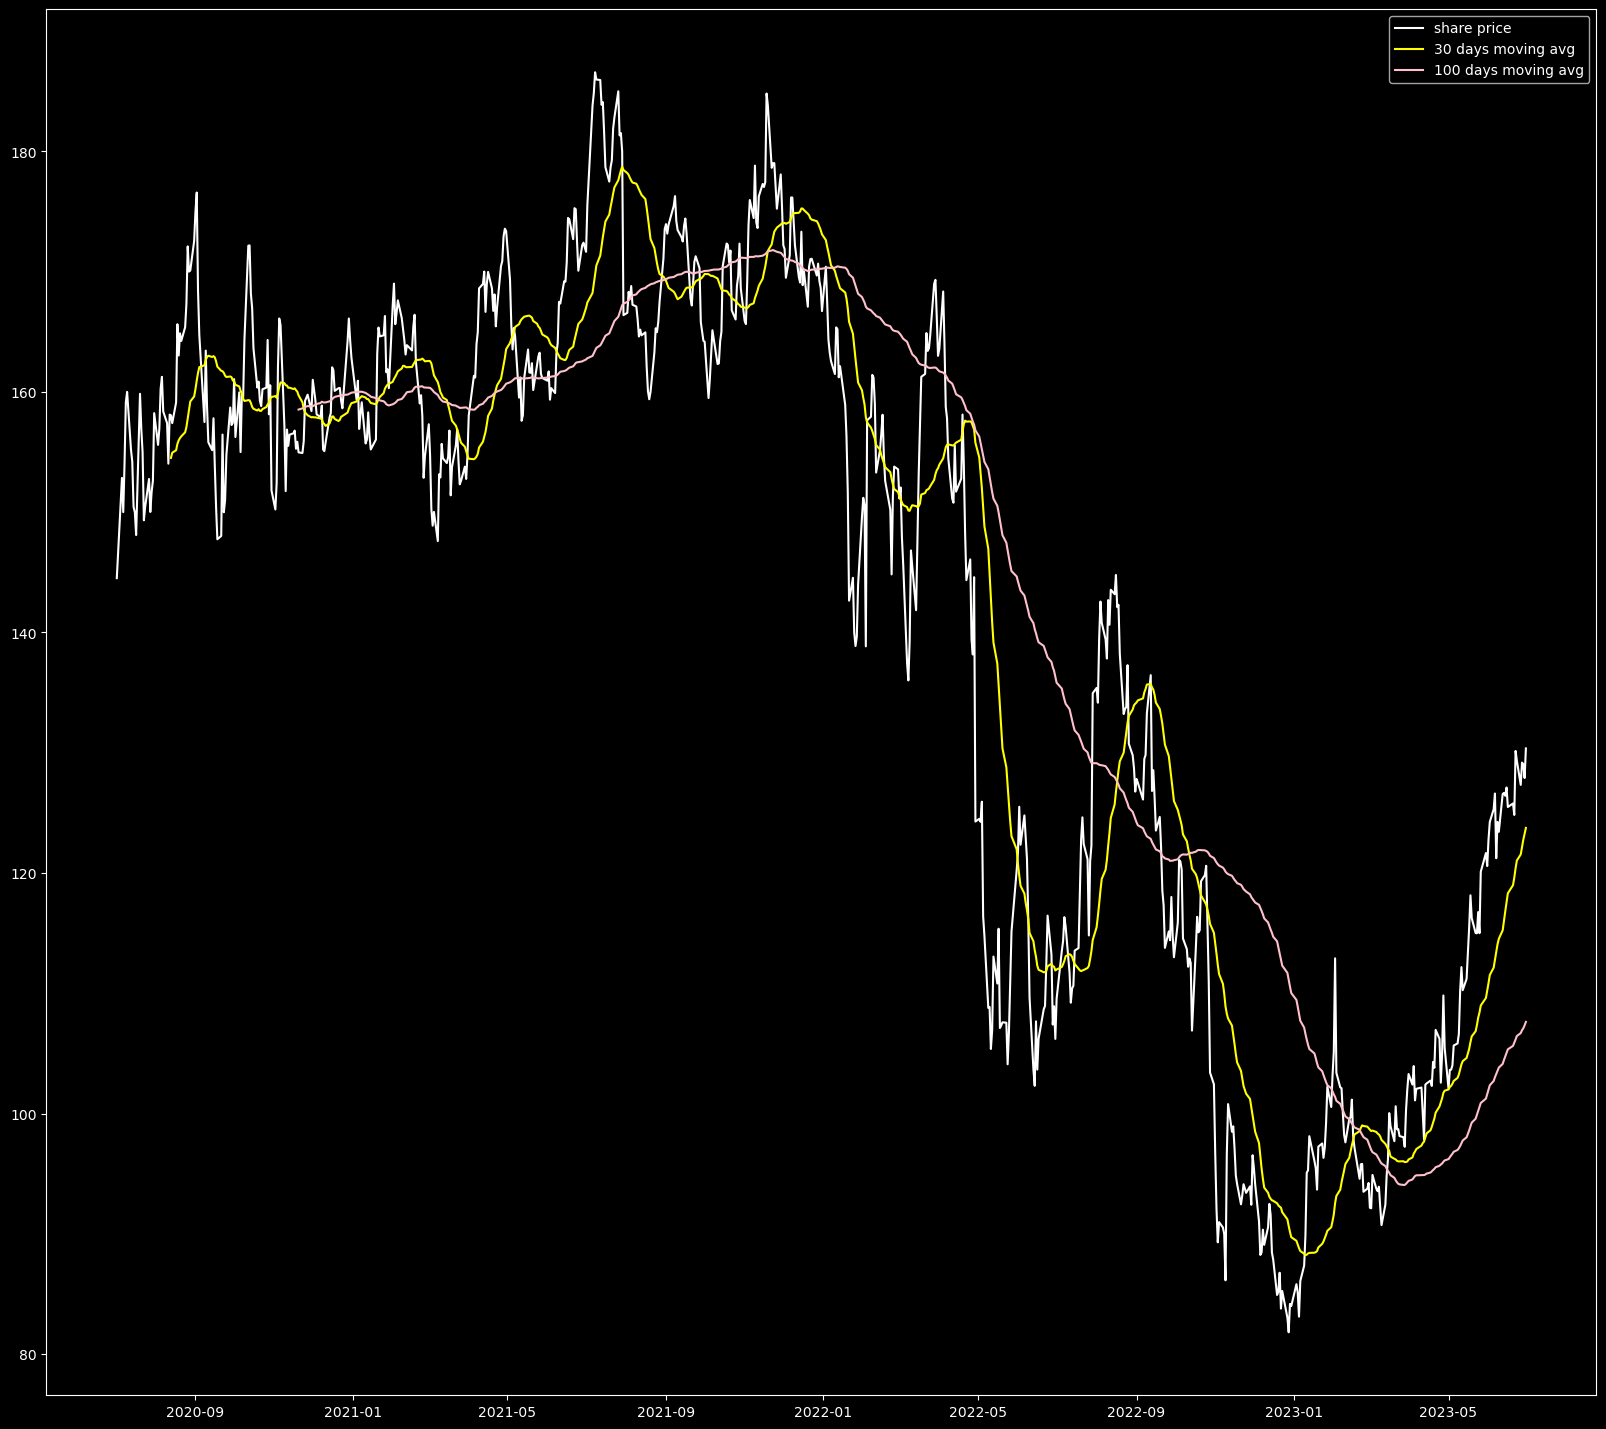

In [11]:
plt.figure(figsize=(20,18))
plt.plot(AMZN['Adj Close'],color='white',label='share price')
plt.plot(AMZN['MA_30'],color='yellow',label='30 days moving avg')
plt.plot(AMZN['MA_100'],color='pink',label='100 days moving avg')
plt.legend()
plt.show()

In [12]:
#for x in range(len(AMZN)):
 #   if(AMZN['MA_30'].iloc[x]>AMZN['MA_100'].iloc[x] and trigger!=1):
  #      buy_signal.append(AMZN['Adj Close'].iloc[x])
   #     sell_signal.append('nan')
    #    trigger=1
    #elif(AMZN['MA_30'].iloc[x]<AMZN['MA_100'].iloc[x] and trigger!=-1) :
     #   sell_signal.append(AMZN['Adj Close'].iloc[x])
      #  buy_signal.append('nan')
       # trigger=-1
    #else :
     #   buy_signal.append('nan')
      #  sell_signal.append('nan')

In [13]:
AMZN['signal']=np.where(AMZN['MA_30']>AMZN['MA_100'],1,0)
AMZN['position']=AMZN['signal'].diff()
AMZN['buy_signals']=np.where(AMZN['position']==1,AMZN['Adj Close'],np.NAN)
AMZN['sell_signals']=np.where(AMZN['position']==-1,AMZN['Adj Close'],np.NAN)

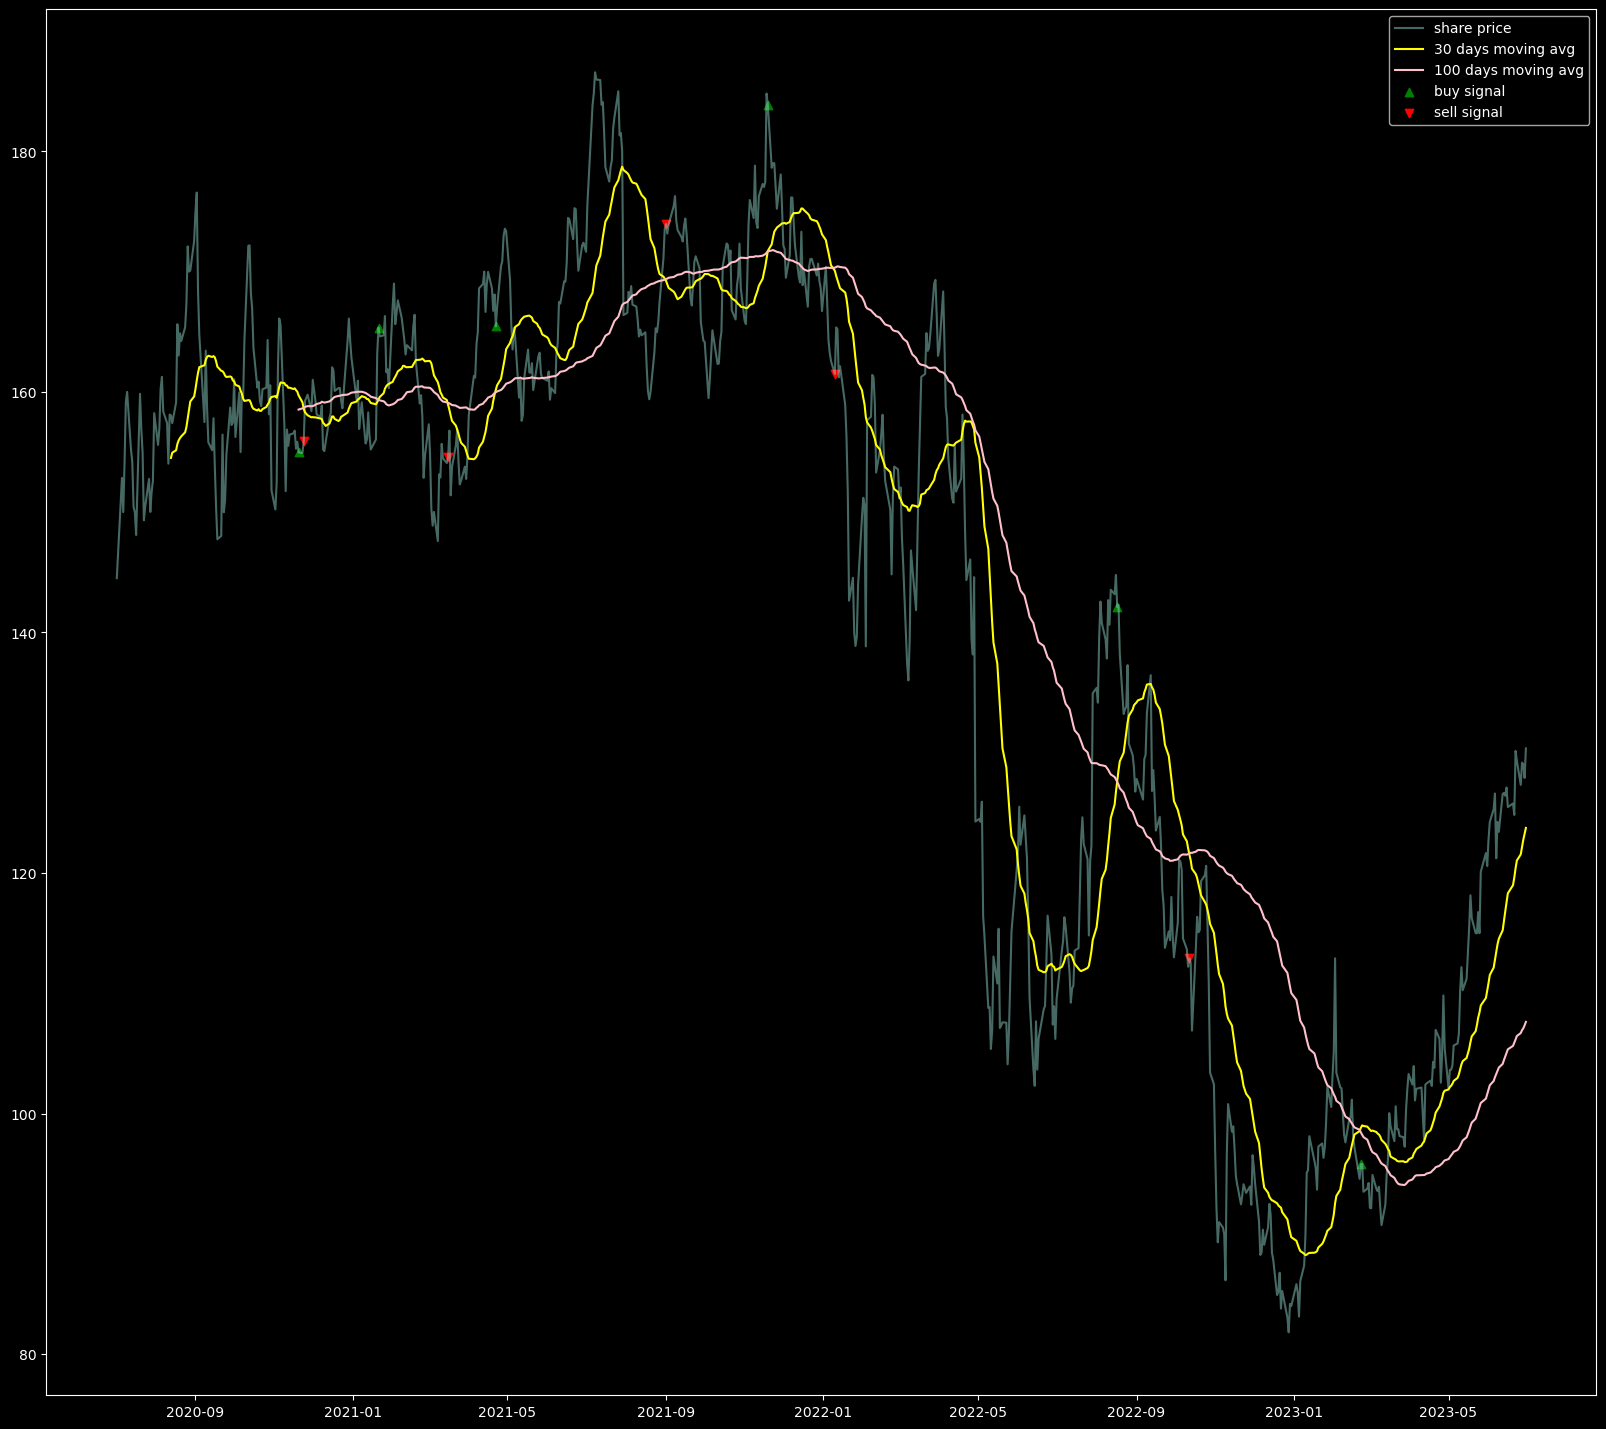

In [14]:
plt.figure(figsize=(20,18))
plt.plot(AMZN['Adj Close'],label='share price',alpha=0.5)
plt.plot(AMZN['MA_30'],color='yellow',label='30 days moving avg')
plt.plot(AMZN['MA_100'],color='pink',label='100 days moving avg')
plt.scatter(AMZN.index, AMZN['buy_signals'],label='buy signal',marker="^",color='green')
plt.scatter(AMZN.index, AMZN['sell_signals'],label='sell signal',marker="v",color='red')

#plt.scatter(AMZN.index[AMZN['buy_signals']], AMZN['Adj Close'][AMZN['buy_signals']], label='buy signal', marker="^", color='green')
#plt.scatter(AMZN.index[AMZN['sell_signals']], AMZN['Adj Close'][AMZN['sell_signals']], label='sell signal', marker="v", color='red')

#plt.scatter(AMZN.index[AMZN['buy_signals'].astype(bool)], AMZN['Adj Close'][AMZN['buy_signals'].astype(bool)], label='buy signal', marker="^", color='green')
#plt.scatter(AMZN.index[AMZN['sell_signals'].astype(bool)], AMZN['Adj Close'][AMZN['sell_signals'].astype(bool)], label='sell signal', marker="v", color='red')

plt.legend()
plt.show()